In [27]:
!pip3 install -r requirements.txt

     |████████████████████████████████| 146 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 68 kB 4.1 MB/s eta 0:00:011


In [19]:
from glob import glob
from os.path import join as pjoin

import gym
import textworld
import textworld.gym
from textworld import EnvInfos

GAMES_PATH = "sample_games"  # This assumes `sample_games.zip` was first unzipped.
gamefiles = glob(pjoin(GAMES_PATH, "*.ulx"))
print("Found {} games.".format(len(gamefiles)))

Found 10 games.


## Playing a game 

In [26]:
gamefile = gamefiles[1]  # Pick a game.

requested_infos = EnvInfos(description=True, inventory=True, extras=["recipe", "walkthrough"])
env_id = textworld.gym.register_games([gamefile], requested_infos)

agent = textworld.agents.HumanAgent()

env = gym.make(env_id)
obs, infos = env.reset()
#game_state = env.reset()

# Since we asked for more infos, let's print them.
print("Walkthrough:", ". ".join(infos["extra.walkthrough"]))
print(infos["extra.recipe"])

#env.render()  # Print the initial observation.

print(obs)

score = 0
done = False
while not done:
    command = input('> ')
    ob, score, done, infos = env.step(command)
    env.render()
    

Walkthrough: open fridge. take yellow bell pepper from fridge. take yellow potato from counter. take knife from table. slice yellow bell pepper with knife. drop knife. take knife. dice yellow potato with knife. drop knife. prepare meal. eat meal
None



                    ________  ________  __    __  ________        
                   |        \|        \|  \  |  \|        \       
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$       
                      | $$   | $$__     \$$\/  $$   | $$          
                      | $$   | $$  \     >$$  $$    | $$          
                      | $$   | $$$$$    /  $$$$\    | $$          
                      | $$   | $$_____ |  $$ \$$\   | $$          
                      | $$   | $$     \| $$  | $$   | $$          
                       \$$    \$$$$$$$$ \$$   \$$    \$$          
              __       __   ______   _______   __        _______  
             |  \  _  |  \ /      \ |       \ |  \      |       \ 
         

KeyboardInterrupt: 

## Visualizing a `TextWorld.Game` object

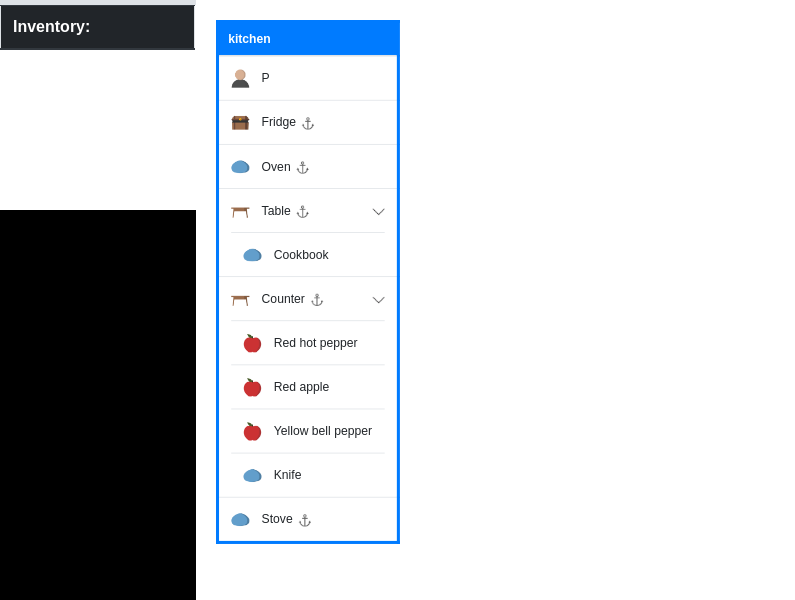

In [14]:
import textworld
gamefile = gamefiles[0]  # Pick a game.
game = textworld.Game.load(gamefile.replace(".ulx", ".json"))
textworld.render.visualize(game)

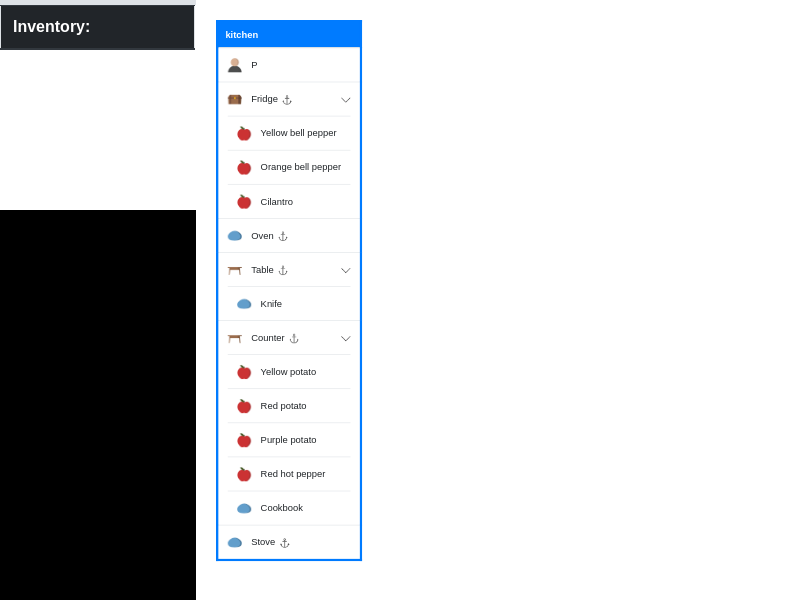

In [15]:
import textworld
gamefile = gamefiles[1]  # Pick a game.
game = textworld.Game.load(gamefile.replace(".ulx", ".json"))
textworld.render.visualize(game)

python: can't open file 'train.py': [Errno 2] No such file or directory
